# Step1: Install and import library

## Step1.1: Install librarys

In [614]:
!pip install opencv-python numpy

## Step1.2: Import librarys

In [615]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Step2: Load Image

In [616]:
image = cv2.imread('/content/Masina.jpg', cv2.IMREAD_GRAYSCALE)

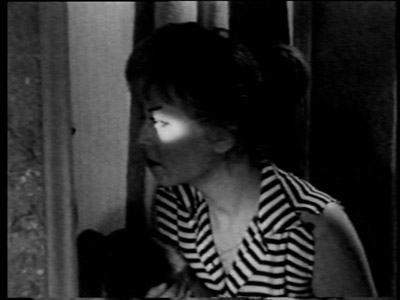

In [617]:
cv2_imshow(image)

# Step3: Show Image With Histogram and charts

## Step3.1: Show Image and Histogram

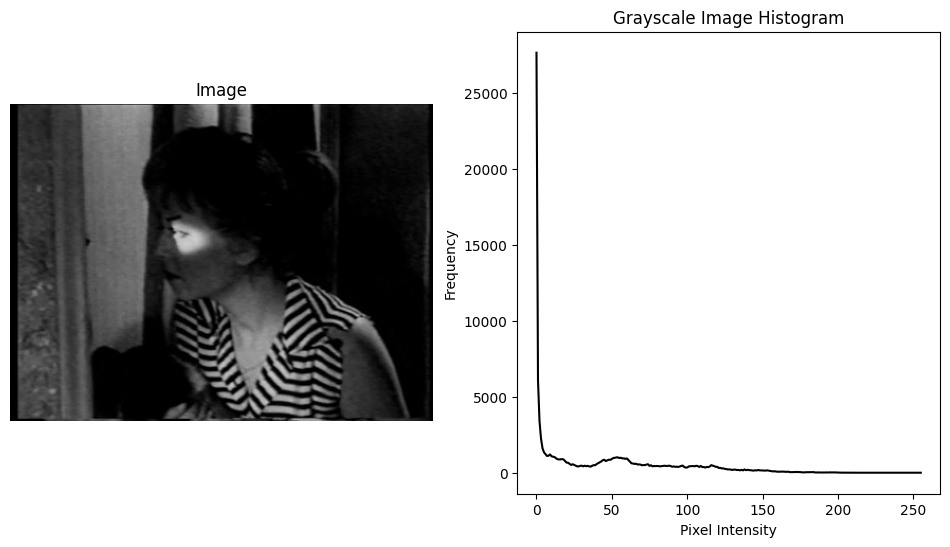

In [618]:
def show_image_with_histogram(image, histogram_title):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(histogram, color='black')
    plt.title(histogram_title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.show()
show_image_with_histogram(image, "Grayscale Image Histogram")

## Step3.2: show Initial and Converted Image and Histogram

In [619]:
def show_images_with_histograms(initial_image, converted_image, method):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    axes[0, 0].imshow(cv2.cvtColor(initial_image, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Initial Image')
    axes[0, 0].axis('off')

    hist_image1 = cv2.calcHist([initial_image], [0], None, [256], [0, 256])
    axes[1, 0].plot(hist_image1, color='black')
    axes[1, 0].set_title('Initial Histogram')
    axes[1, 0].set_xlabel('Pixel Intensity')
    axes[1, 0].set_ylabel('Frequency')

    axes[0, 1].imshow(cv2.cvtColor(converted_image, cv2.COLOR_BGR2RGB))
    axes[0, 1].set_title(method + ' Image')
    axes[0, 1].axis('off')

    hist_image2 = cv2.calcHist([converted_image], [0], None, [256], [0, 256])
    axes[1, 1].plot(hist_image2, color='black')
    axes[1, 1].set_title(method + ' Histogram')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## Step3.3: show Initial and Converted Image and Histogram and charts

In [620]:
def show_image_with_histogram_and_charts(image, i, gamma_corrected):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image ' + str(i + 1))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.plot(histogram, color='black')
    plt.title("histogram " + str(i + 1) + "th image")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.plot(x, gamma_corrected, label=f'Gamma = {gamma:.1f}')
    plt.plot(x, x, '--', color='gray', label='Original')
    plt.title(f'Gamma = {gamma:.1f}')
    plt.xlabel('Original Intensity (Normalized)')
    plt.ylabel('Corrected Intensity (Normalized)')
    plt.legend()
    plt.grid(True)

    plt.show()

# Step4: **Method1(Remove Blur): Remove Motion Blur**

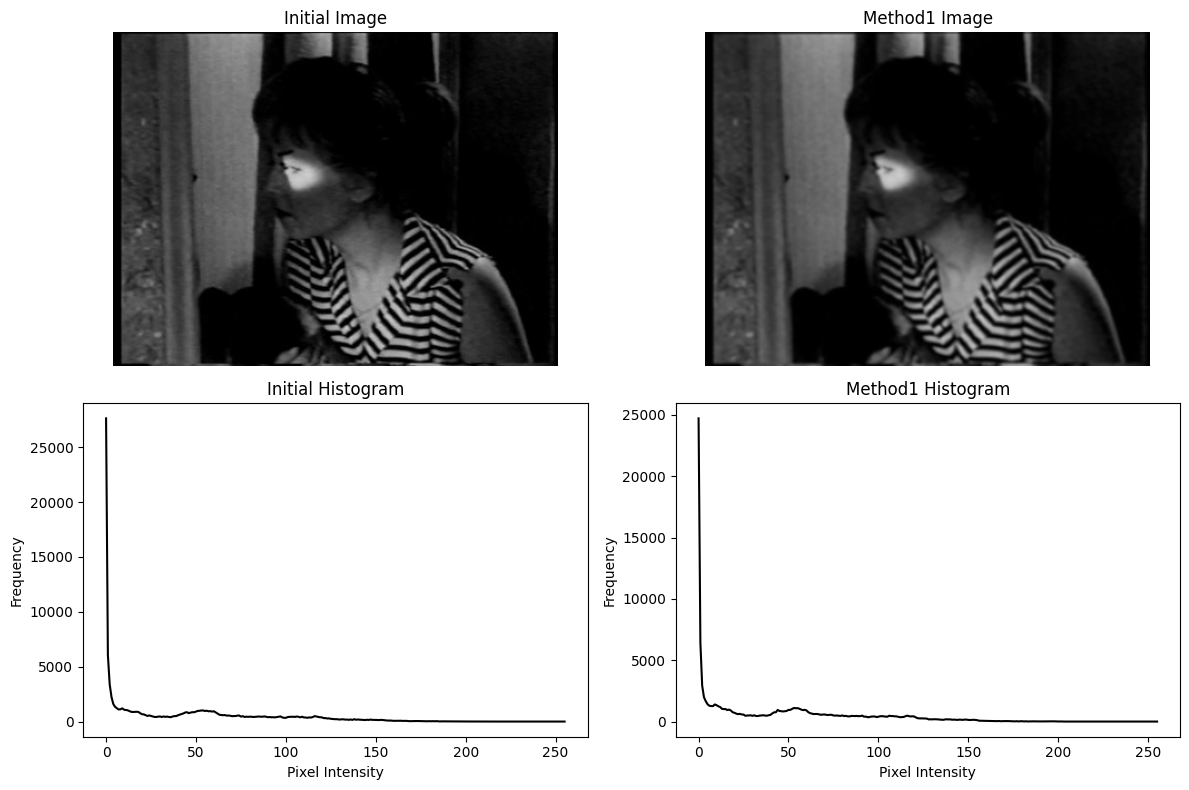

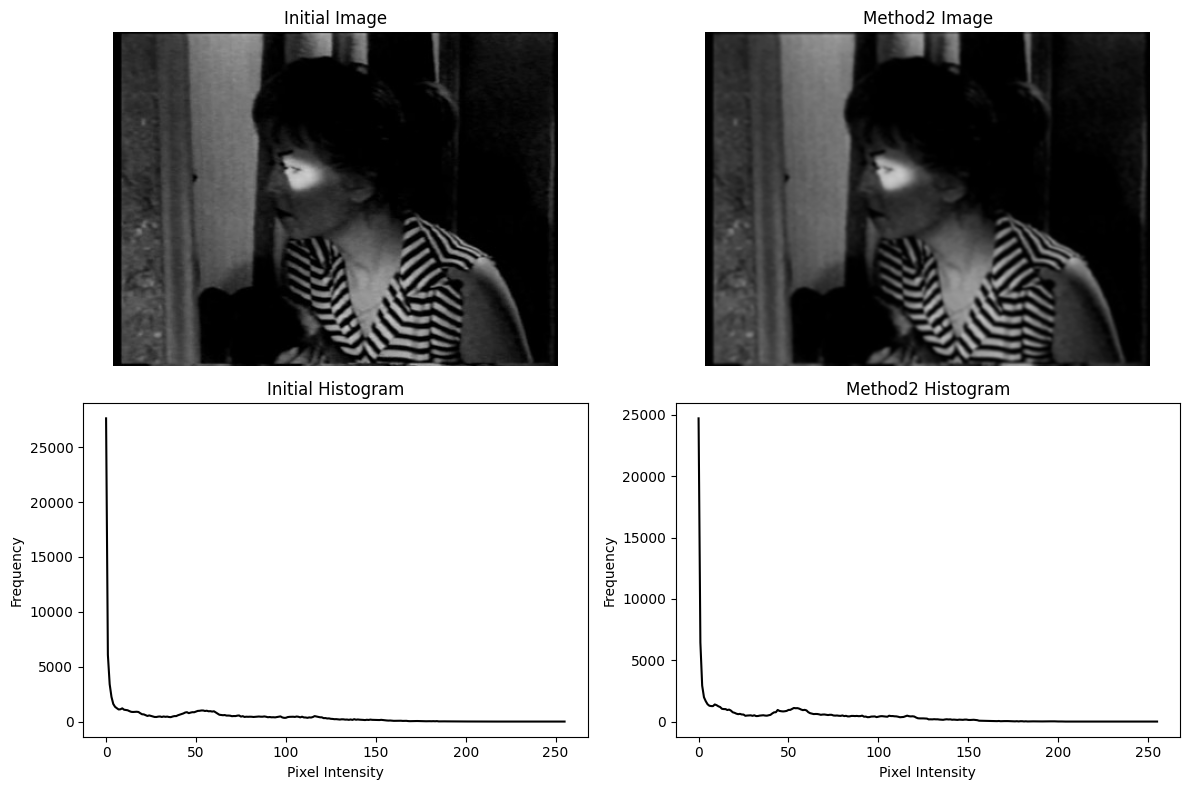

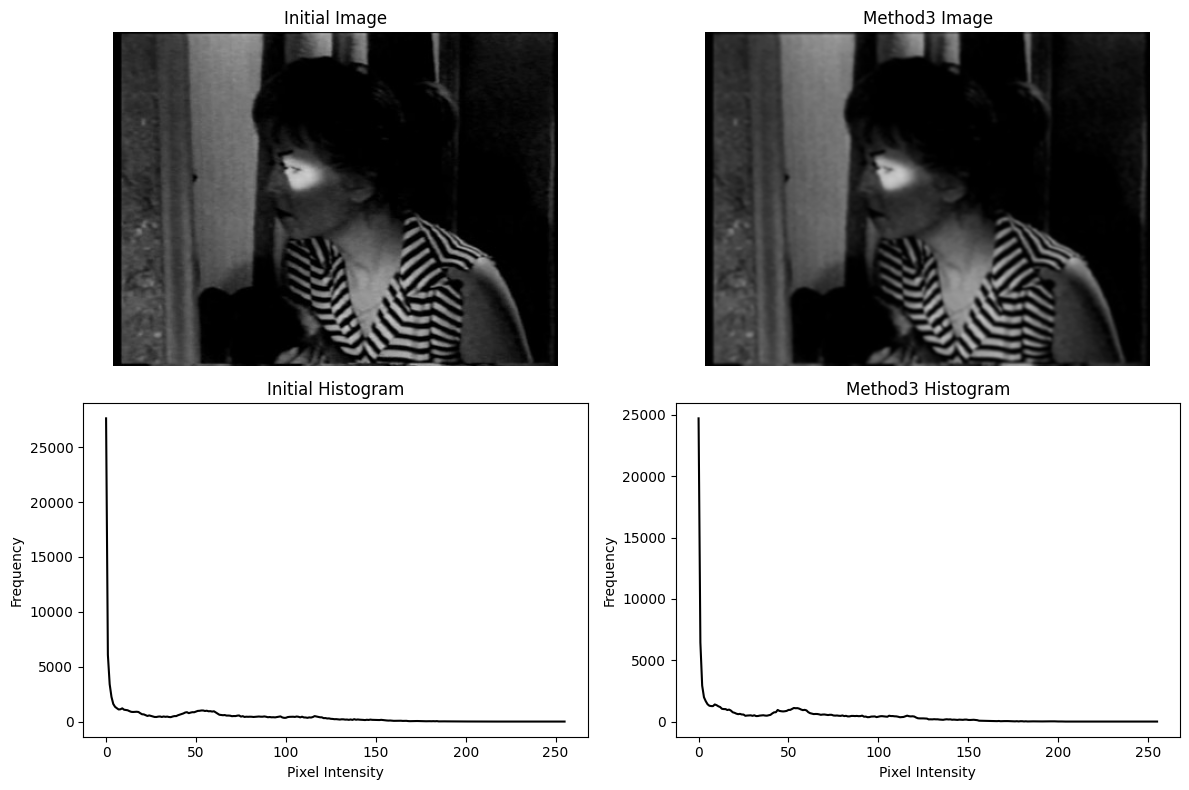

In [621]:
# method1
estimated_kernel_size = 3
kernel = np.ones((estimated_kernel_size, estimated_kernel_size), np.float32) / (estimated_kernel_size ** 2)
restored_image1 = cv2.filter2D(image, -1, kernel)
# method2 (best)
unsharp_image = cv2.GaussianBlur(image, (0, 0), 3)
unsharp_image = cv2.addWeighted(image, 1.5, unsharp_image, -0.5, 0)
# method3
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
restored_image3 = cv2.filter2D(image, -1, kernel)

show_images_with_histograms(image, restored_image1, "Method1")
show_images_with_histograms(image, restored_image1, "Method2")
show_images_with_histograms(image, restored_image1, "Method3")

# Step5: **Method1(Remove Blur):Sharping Edge**

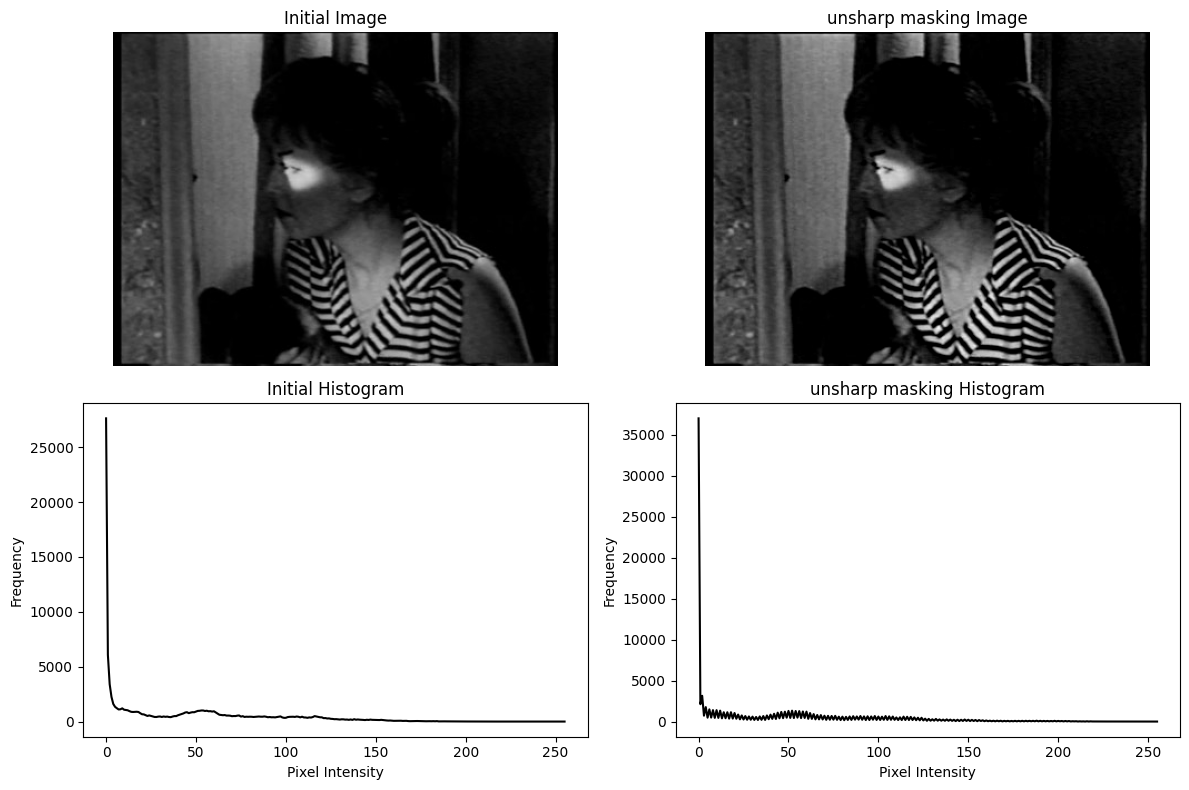

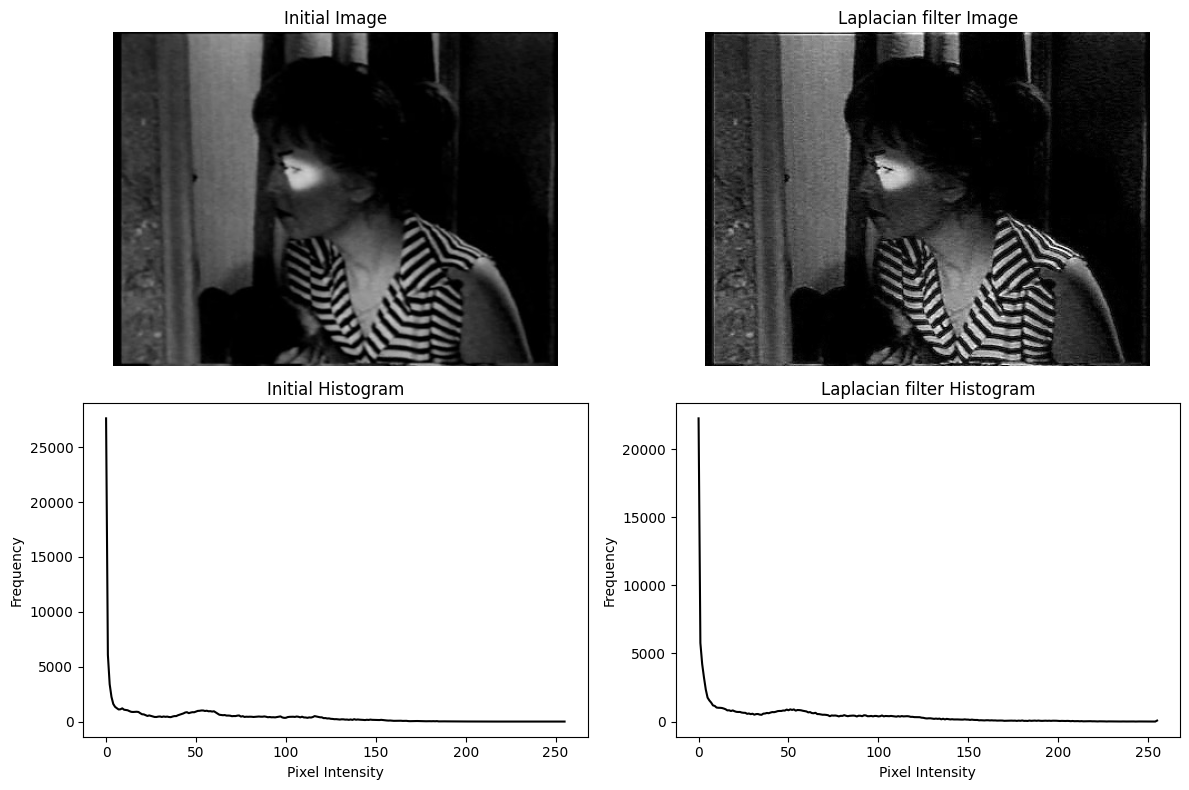

In [622]:
# Method1 : Perform unsharp masking to enhance edges (better)
def sharp1(image):
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    sharp = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return sharp


# Method2 : Apply Laplacian filter for edge enhancement (best)
def sharp2(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharp = cv2.convertScaleAbs(image - laplacian)
    return sharp

show_images_with_histograms(image, sharp1(image), "unsharp masking")
show_images_with_histograms(image, sharp2(image), "Laplacian filter")

# Step6: **Method1: Histogram Equalization**

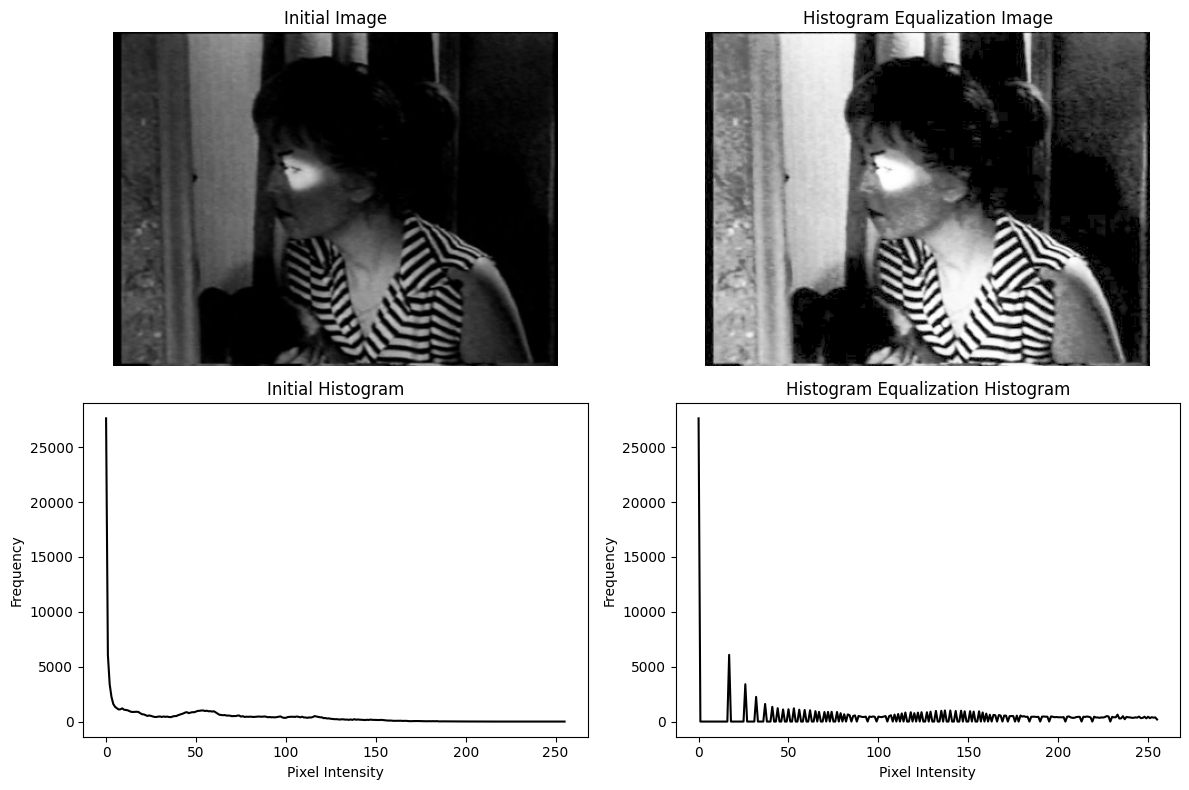

In [623]:
equalized_image = cv2.equalizeHist(image)
show_images_with_histograms(image, equalized_image, "Histogram Equalization")

# Step7: **Method2: Adaptive Histogram Equalization**

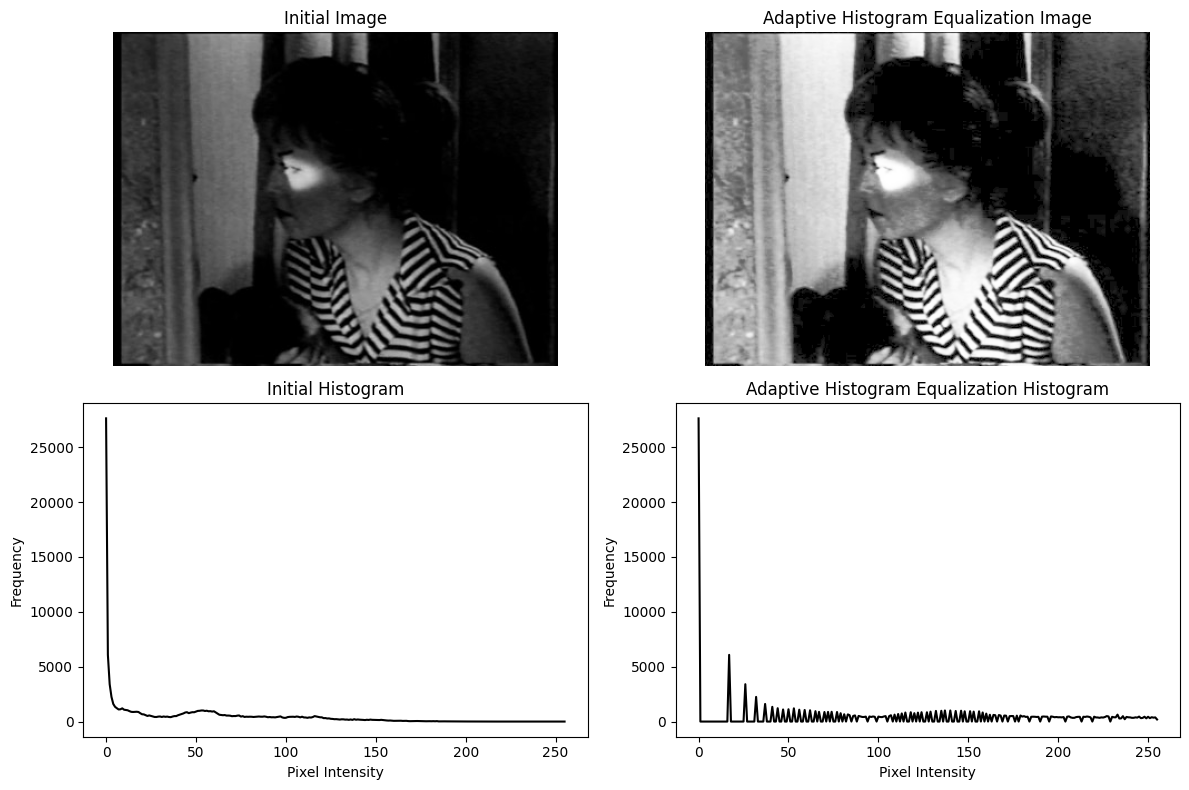

In [624]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image)
show_images_with_histograms(image, equalized_image, "Adaptive Histogram Equalization")

# Step8: **Method3: Gamma Correction**

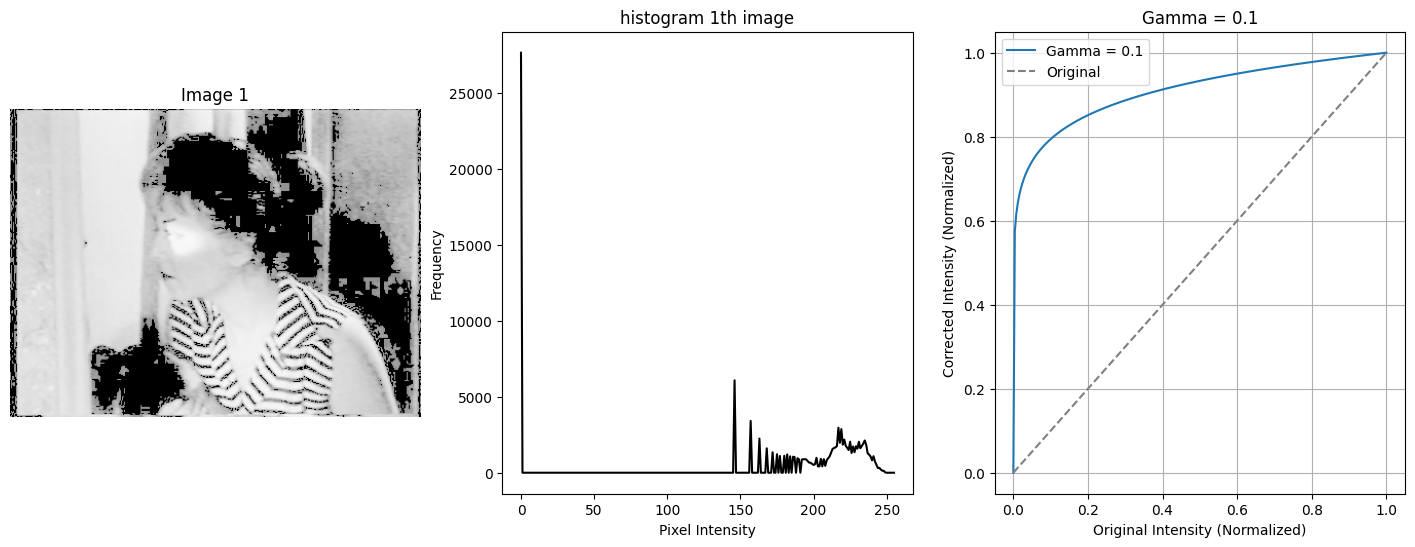

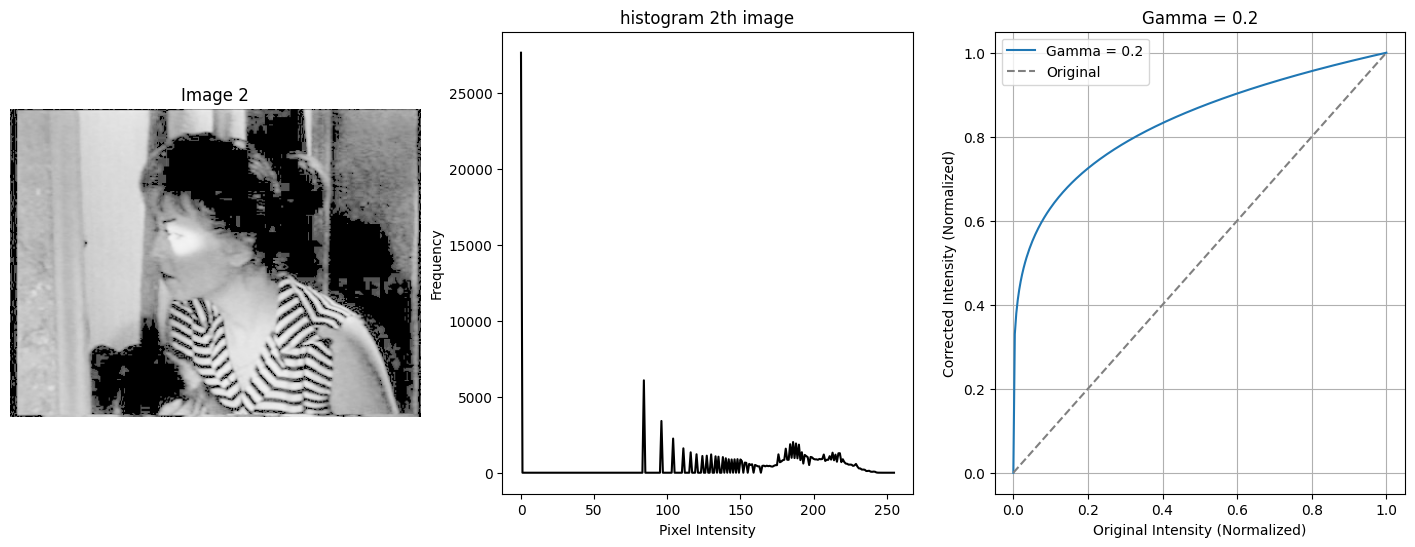

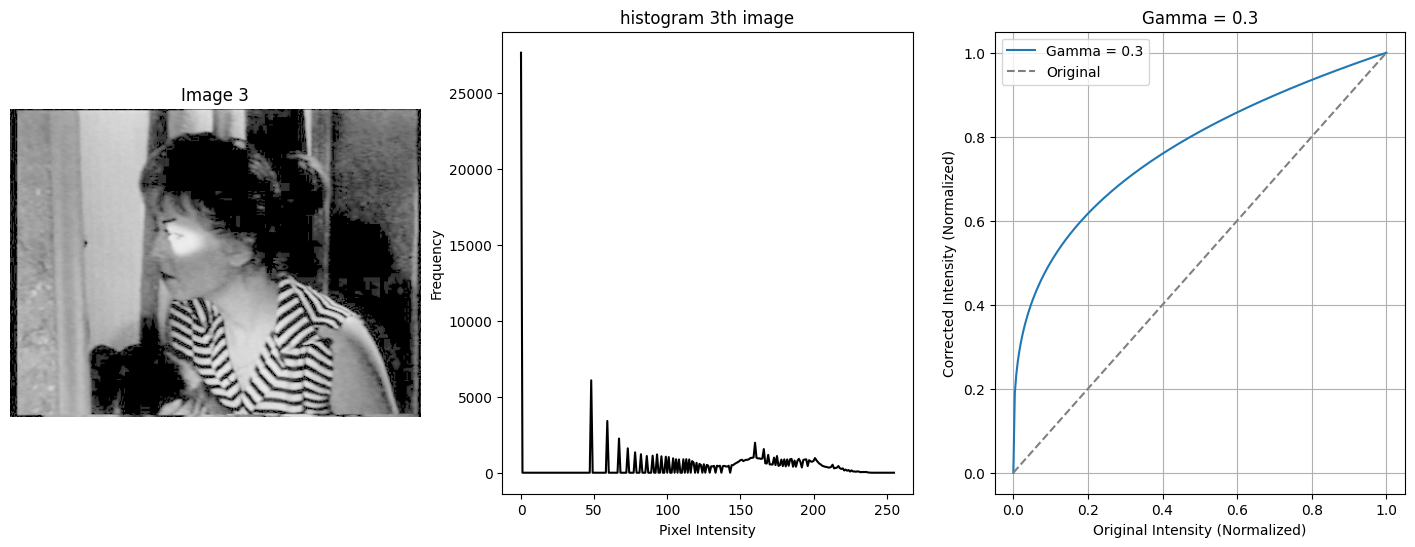

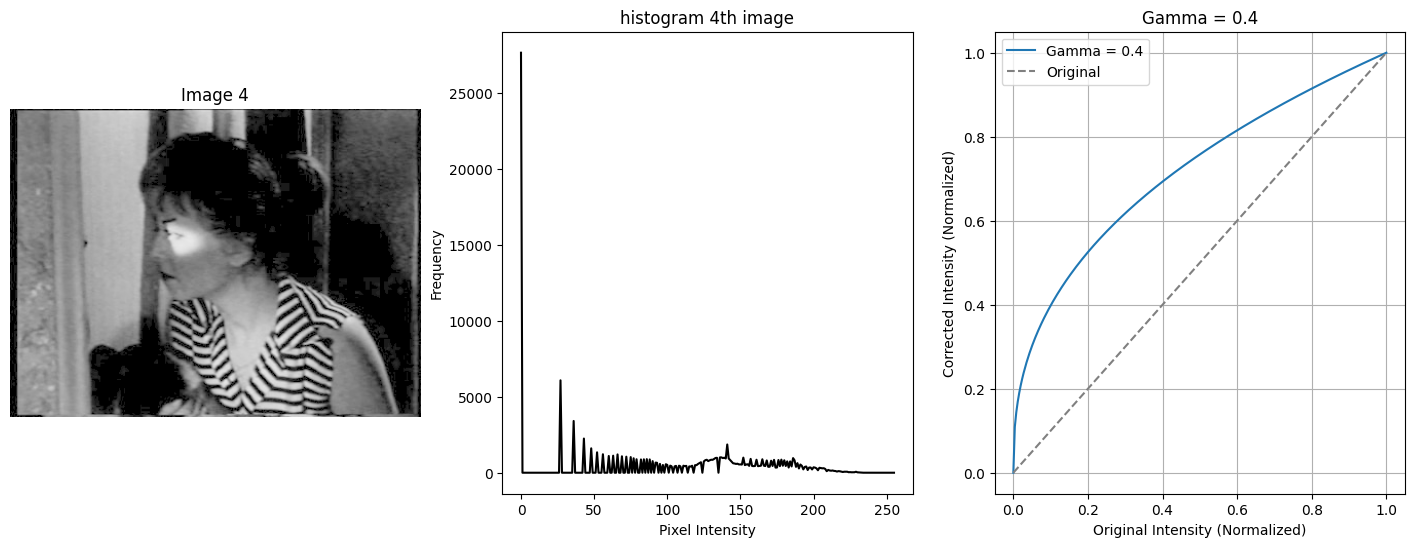

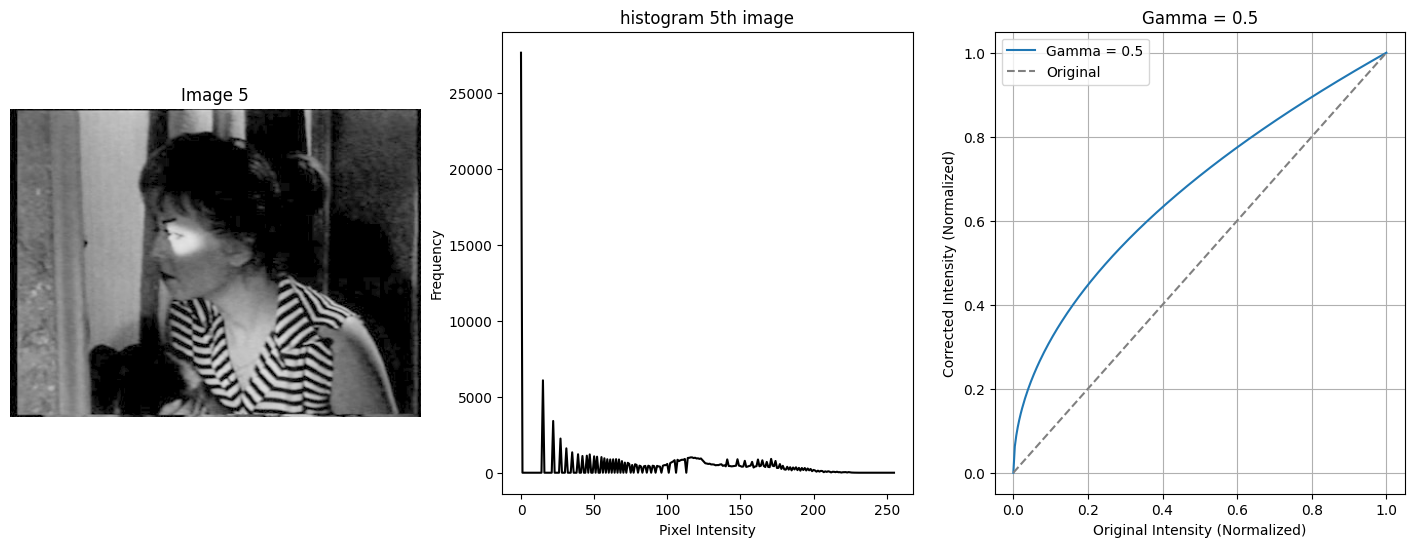

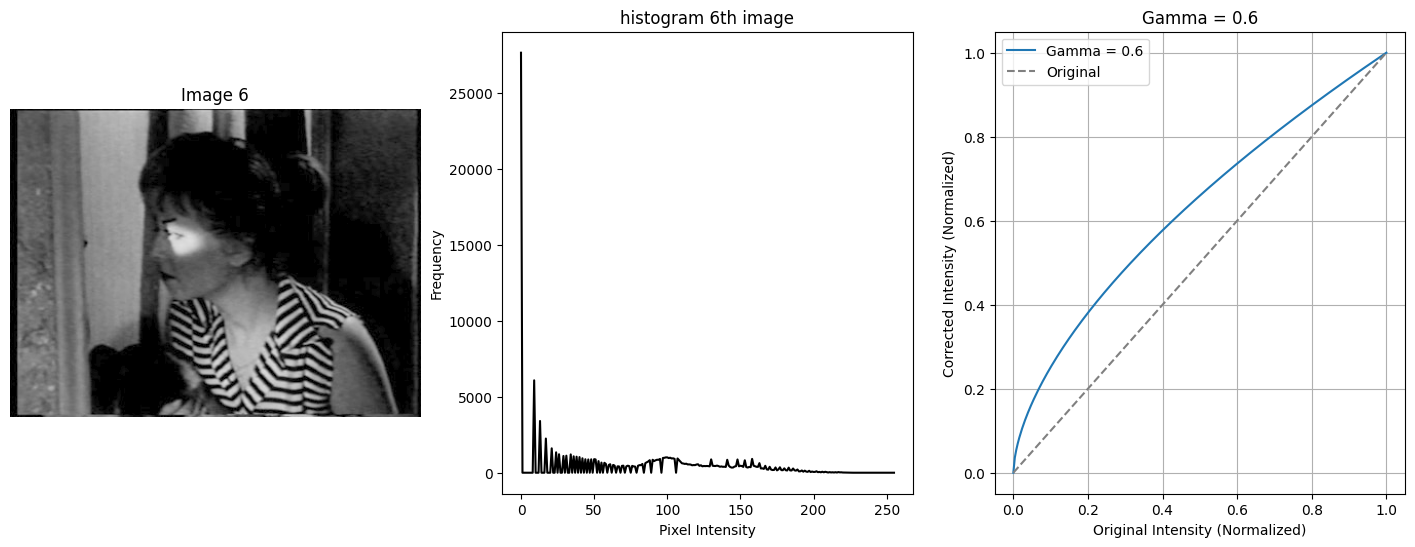

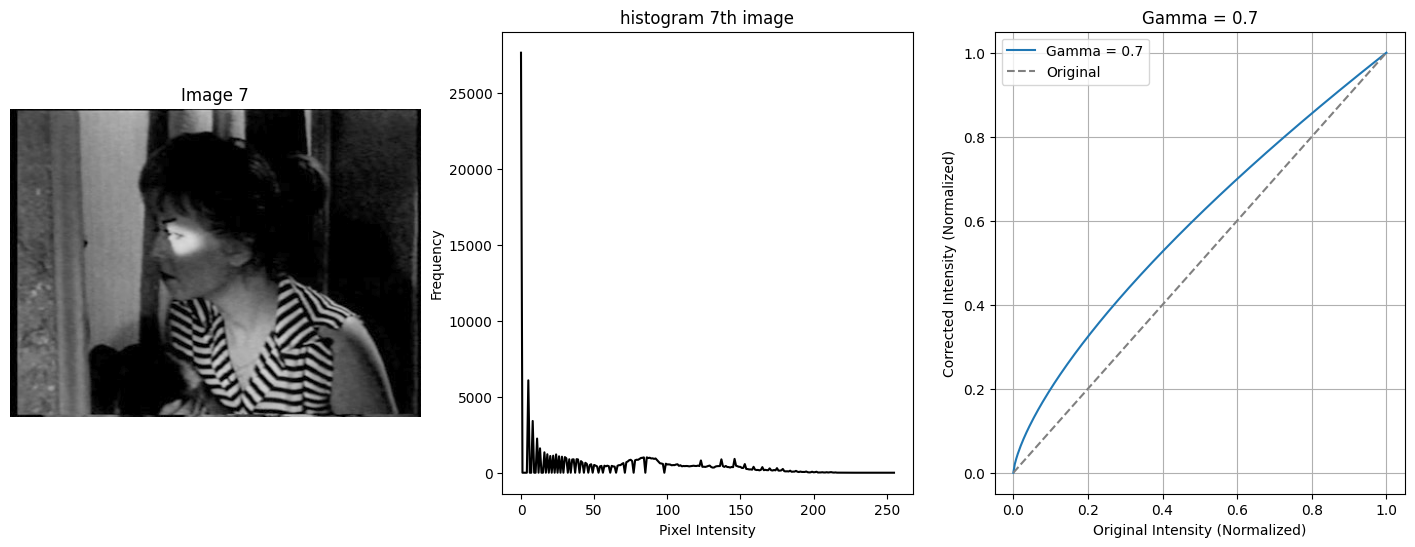

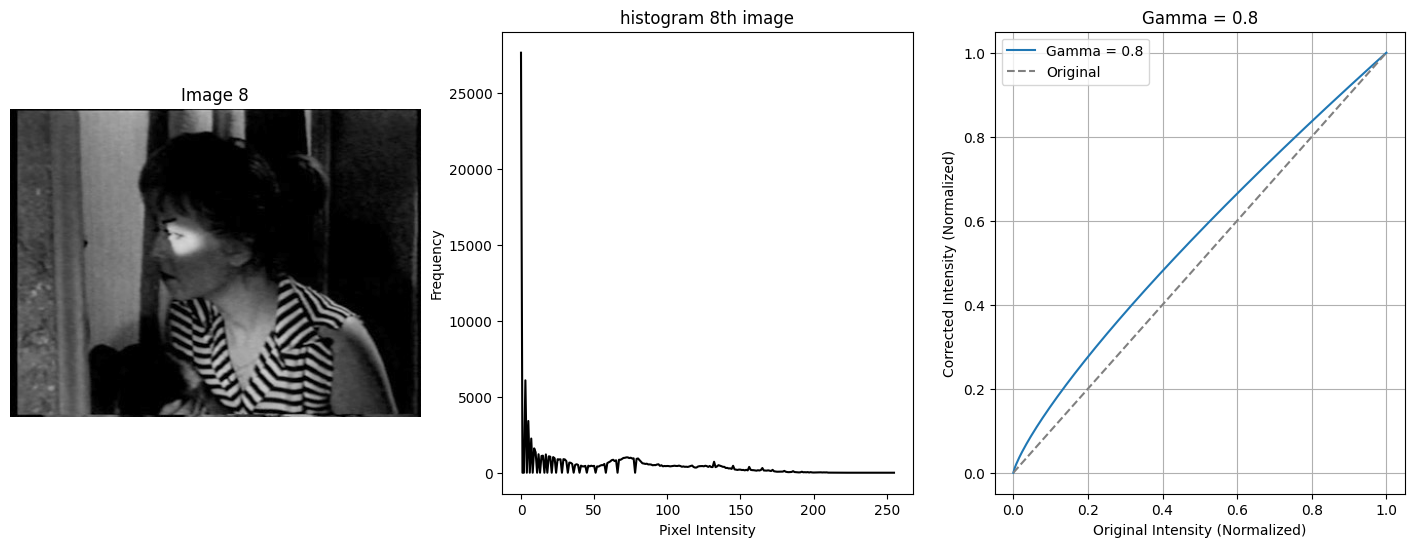

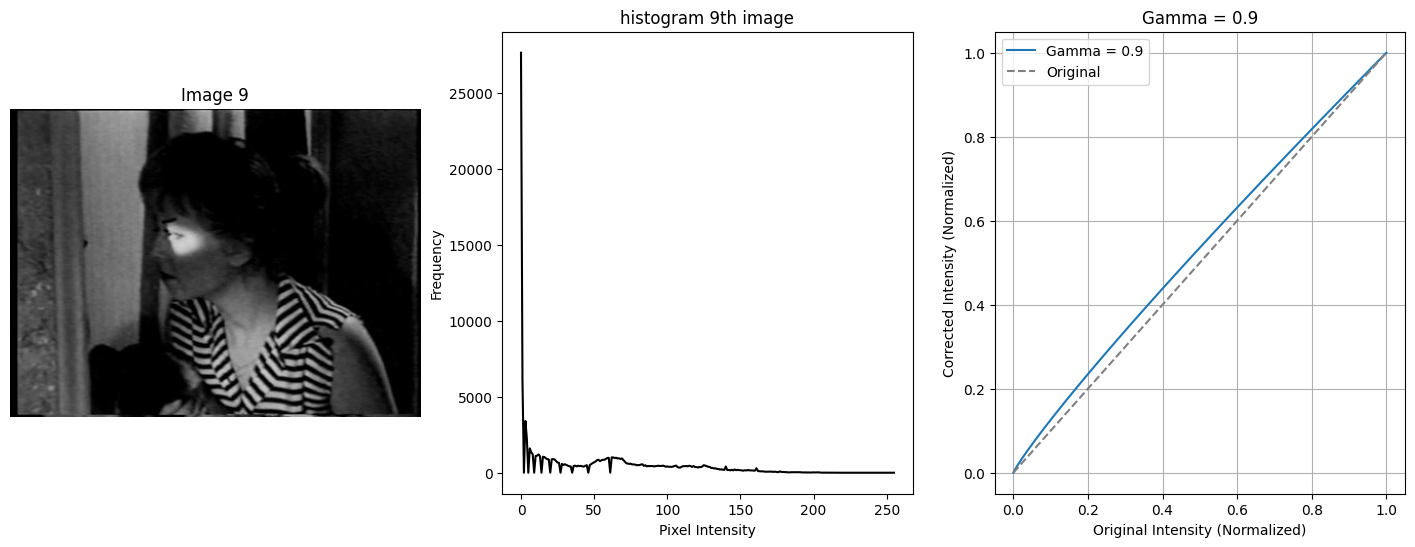

In [625]:
gamma_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
x = np.linspace(0, 1, 256)

gamma_images = []
for i, gamma in enumerate(gamma_values):
    gamma_corrected = x ** gamma
    corrected_image = np.uint8(255 * (image / 255) ** gamma)
    show_image_with_histogram_and_charts(corrected_image, i, gamma_corrected)
    gamma_images.append(corrected_image)

# Step9: Apply Sharping

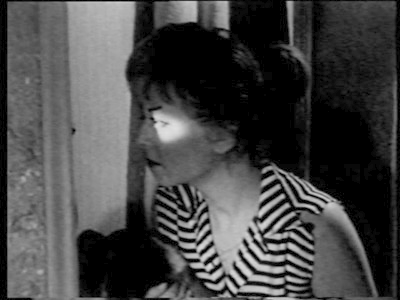

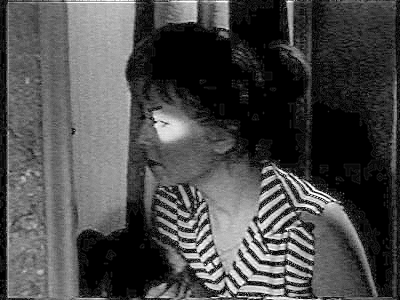

In [631]:
cv2_imshow(gamma_images[5])
image_sharped = sharp2(gamma_images[5])
cv2_imshow(image_sharped)

# Step10: **Method4: Selective**

## Step9.1: Selective with binary

In [627]:
_, binary_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

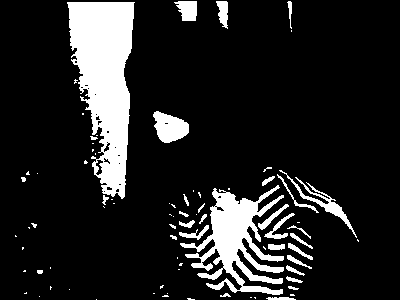

In [628]:
cv2_imshow(binary_image)

## Step9.2: Selective with roi and log formula

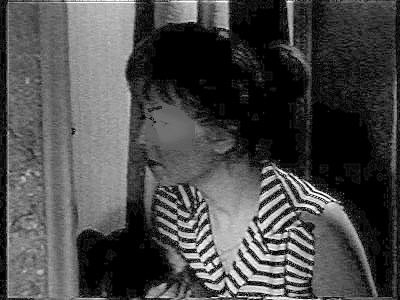

In [632]:

x1, y1 = 145, 100
x2, y2 = 195, 150

roi = image_sharped[y1:y2, x1:x2].copy()

_, mask = cv2.threshold(roi, 75, 255, cv2.THRESH_BINARY)

darkened_roi = roi.copy()
c = 115 / np.log(1 + np.max(darkened_roi))
darkened_roi[mask != 0] = c * (np.log(1 + darkened_roi[mask != 0]))

processed_image = image_sharped.copy()
processed_image[y1:y2, x1:x2] = darkened_roi

cv2_imshow(processed_image)

## Step9.3: Selective with roi and gamma formula

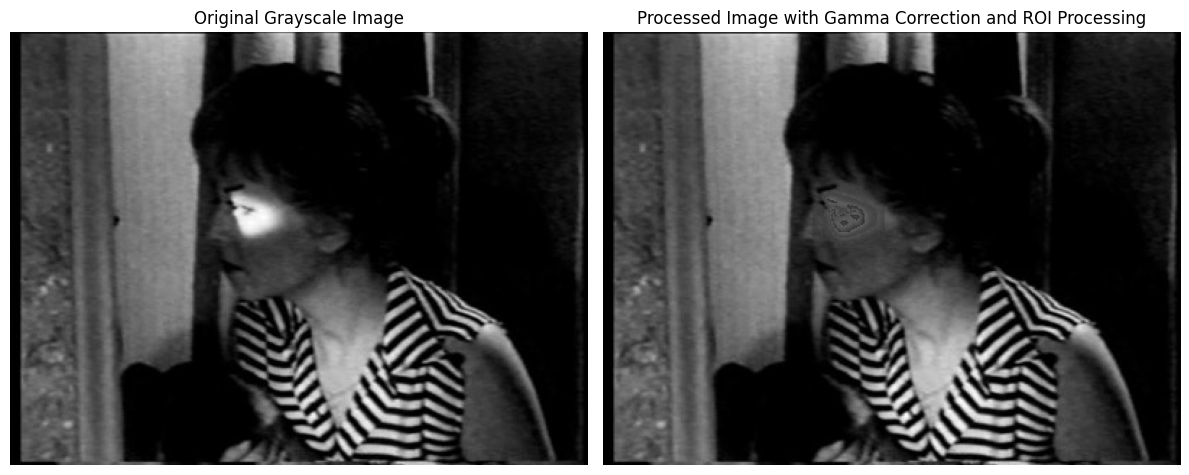

In [630]:
def apply_piecewise_gamma_correction(image, gamma_ranges, roi_coords):
    x1, y1, x2, y2 = roi_coords
    roi = image[y1:y2, x1:x2].copy()

    gamma_corrected_roi = np.zeros_like(roi, dtype=np.float32)
    for threshold, gamma in gamma_ranges:
        mask = roi >= threshold
        gamma_corrected_roi[mask] = np.power(roi[mask] / 255.0, gamma) * 255.0

    gamma_corrected_roi = np.clip(gamma_corrected_roi, 0, 255).astype(np.uint8)

    c = 255 / np.log(1 + np.max(gamma_corrected_roi))
    darkened_roi = gamma_corrected_roi.copy()
    darkened_roi[gamma_corrected_roi >= 75] = c * (np.log(1 + gamma_corrected_roi[gamma_corrected_roi >= 75]))

    processed_image = image.copy()
    processed_image[y1:y2, x1:x2] = darkened_roi

    return processed_image

gray_image = image

gamma_ranges = [
    (0, 1),
    (50, 1.1),
    (60, 1.15),
    (70, 1.2),
    (80, 1.3),
    (90, 1.5),
    (95, 1.6),
    (100, 1.7),
    (105, 1.8),
    (110, 1.9),
    (115, 2),
    (120, 2.1),
    (125, 2.2),
    (130, 2.3),
    (135, 2.4),
    (140, 2.5),
    (145, 2.6),
    (150, 2.7),
    (155, 2.8),
    (160, 2.9),
    (165, 3),
    (170, 3.3),
    (175, 5),
    (200, 7.5)
]

roi_coords = (145, 100, 195, 150)

processed_image = apply_piecewise_gamma_correction(gray_image, gamma_ranges, roi_coords)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title('Processed Image with Gamma Correction and ROI Processing')
plt.axis('off')

plt.tight_layout()
plt.show()
